In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [70]:
def rm_outliers(df, col):
    '''
    Remove rows that in column 'col' those points are outliers.
    df:: dataframe
    col:: string, name of one column
    return:: dataframe
    '''
    outlier_upper_limit =\
    df[col].describe()['75%'] + (df[col].describe()['75%'] - df[col].describe()['25%']) * 1.5
    outlier_lower_limit =\
    df[col].describe()['25%'] - (df[col].describe()['75%'] - df[col].describe()['25%']) * 1.5
    
    data = df[(df[col] <= outlier_upper_limit)&(df[col] >= outlier_lower_limit)]
    return data

def fit_norm_dist(data):
    '''
    For 1-D numpy array, plot histogram and fit to normal distribution.
    data:: 1-D numpy array.
    '''
    import numpy as np
    from scipy.stats import norm

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.show()
    return

### S&P 500 PE
正常估值：15$\pm$5 PE

In [14]:
df = pd.read_csv("sp-500-pe-ratio-price-to-earnings-chart.csv")

In [24]:
df['round_pe'] = df.value.round(0)

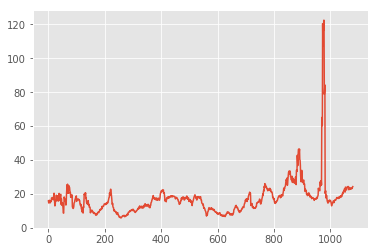

In [67]:
plt.plot(df.value)
plt.show()

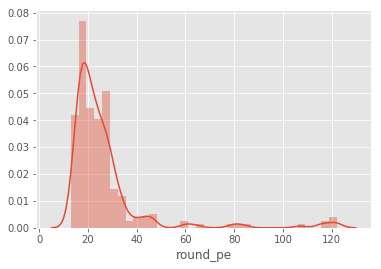

In [40]:
sns.distplot(df[df.date > '1998-01-01'].round_pe, norm_hist=True)
plt.show()

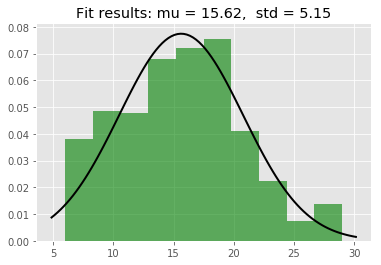

In [71]:
data = rm_outliers(df, 'round_pe').round_pe.values
fit_norm_dist(data)